<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [3]:
# Data handling & processing
import pandas as pd  # For reading and manipulating tabular data
import numpy as np   # For numerical operations

# Visualization
import matplotlib.pyplot as plt  # For plotting charts
import seaborn as sns  # For prettier statistical plots

# Preprocessing
from sklearn.model_selection import train_test_split  # To split dataset
from sklearn.preprocessing import StandardScaler, LabelEncoder  # For scaling and encoding

# Handling imbalance
from imblearn.over_sampling import SMOTE  # For handling class imbalance

# Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Neural Network

#Imports the tensorflow,keras and layers.
import tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras import backend

# Settings
import warnings
warnings.filterwarnings('ignore')  # To ignore warnings in output


## Loading the dataset

In [5]:
# Mount on my drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Load Dataset
BCP = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Neural networks/Project 4/bank-1.csv')
# A copy of the original dataset before performing any operations
data = BCP.copy()

## Data Overview

Display the first rows

In [7]:
# Display the first 5 rows
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Display the last rows

In [8]:
# Let's view the last 5 rows of the data
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


Checking the shape of the dataset

In [9]:
# Shape of the data
data.shape

(10000, 14)

Checking the data types of the columns of the dataset

In [10]:
# Check column names and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Checking for missing values

In [11]:
# Check for missing values
data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


Target Variable Distribution
Let’s check how many customers have churned vs stayed.

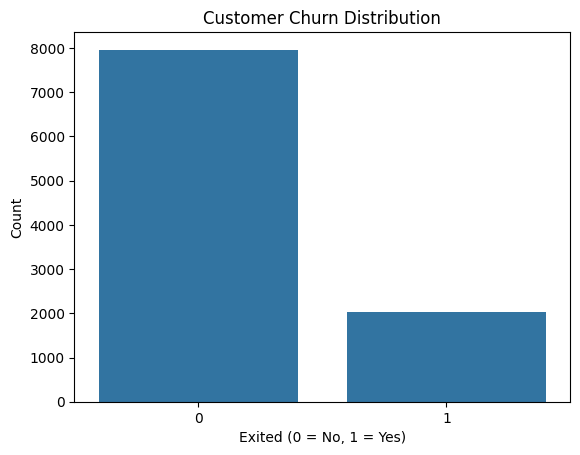

Churn Rate (%):
 Exited
0    79.63
1    20.37
Name: proportion, dtype: float64


In [12]:
# Count of churned vs not churned
sns.countplot(x='Exited', data=data)
plt.title("Customer Churn Distribution")
plt.xlabel("Exited (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Percentage of churn
churn_rate = data['Exited'].value_counts(normalize=True) * 100
print("Churn Rate (%):\n", churn_rate)


 Data Summary (Descriptive Statistics)

In [13]:
# Summary statistics
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Categorical Columns
List the non-numeric features:

In [14]:
data.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

Checking for duplicate values

In [15]:
# Let's check for duplicate values in the data
data.duplicated().sum()

np.int64(0)

In [16]:
# Let's check the number of unique values in each column
data.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


In [17]:
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in Surname are :
Surname
Smith        32
Scott        29
Martin       29
Walker       28
Brown        26
             ..
Hull          1
Sturdee       1
Flannagan     1
Dwyer         1
Corby         1
Name: count, Length: 2932, dtype: int64
**************************************************
Unique values in Geography are :
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
**************************************************
Unique values in Gender are :
Gender
Male      5457
Female    4543
Name: count, dtype: int64
**************************************************


## Exploratory Data Analysis

### Univariate Analysis

Numerical features

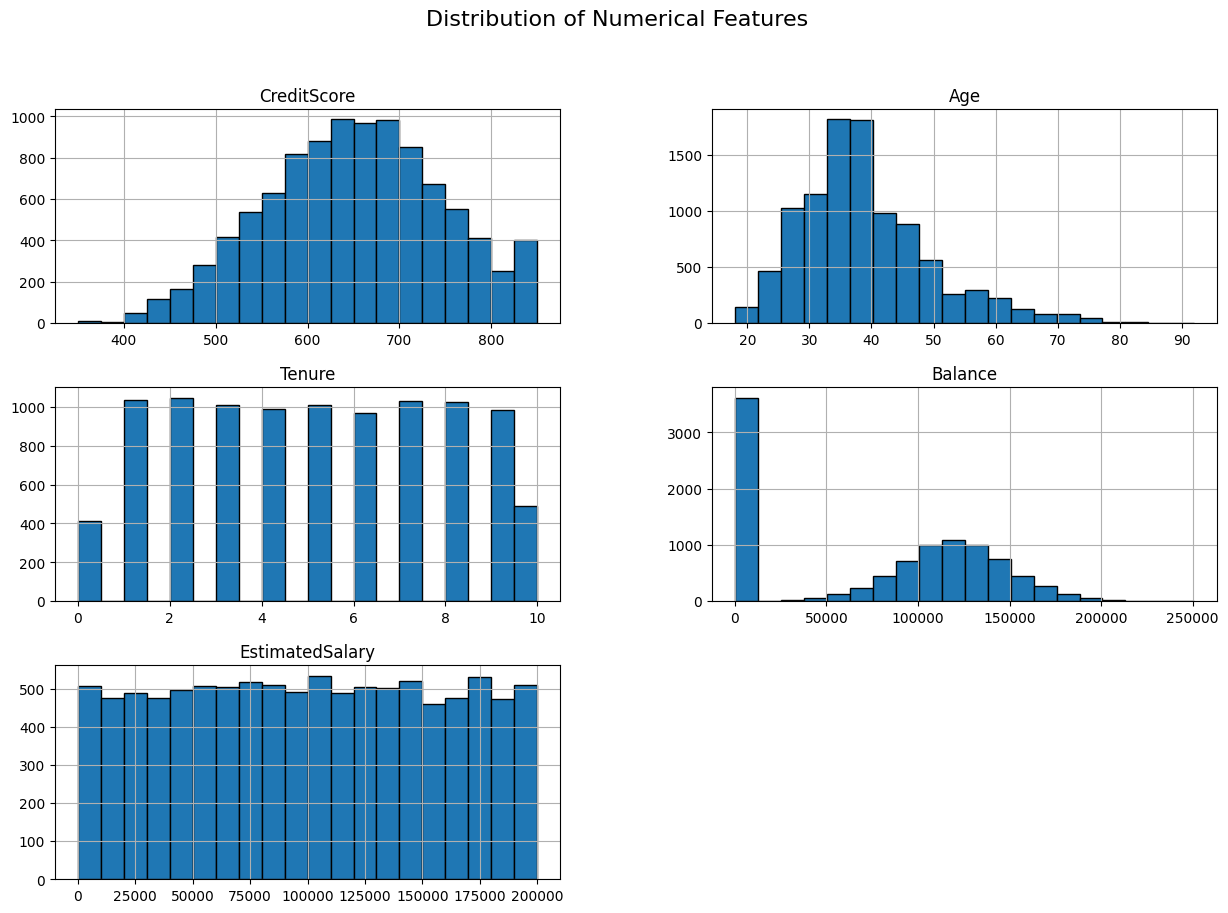

In [18]:
# Numerical features distribution
num_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
data[num_features].hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()


**Observations from the Distribution of Numerical Features (Histograms):**

* **CreditScore:** The distribution of credit scores appears somewhat close to a normal distribution but slightly left-skewed. Most customers have credit scores between 600 and 750.
* **Age:** The age distribution is right-skewed, indicating that the majority of customers are in the younger to middle-aged range (around 30-40 years old), with a tail extending towards older ages. There are also some noticeable peaks, possibly indicating common age groups.
* **Tenure:** The tenure (number of years as a customer) shows a relatively uniform distribution across the different year values (0 to 10), with slight variations. This suggests a fairly even spread of customer loyalty durations.
* **Balance:** The balance distribution is strongly right-skewed. A large number of customers have a balance close to zero, while the rest have balances distributed across a wider range, with fewer customers having very high balances.
* **EstimatedSalary:** The estimated salary appears to be roughly uniformly distributed across the range, with no clear peaks or skewness. This suggests a diverse range of income levels among the customers.

**In summary:**

* **CreditScore** is somewhat normally distributed.
* **Age** is skewed towards younger to middle ages.
* **Tenure** is relatively evenly distributed.
* **Balance** is heavily skewed towards lower values (many with zero balance).
* **EstimatedSalary** is fairly uniformly distributed.

Categorical features

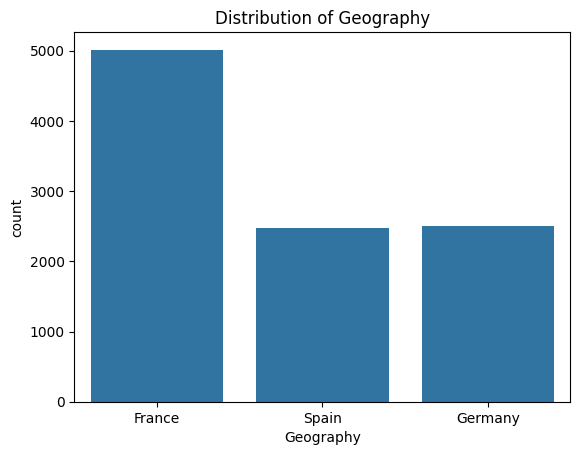

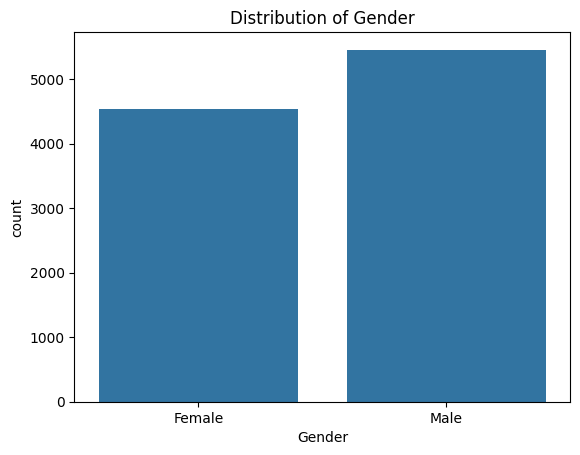

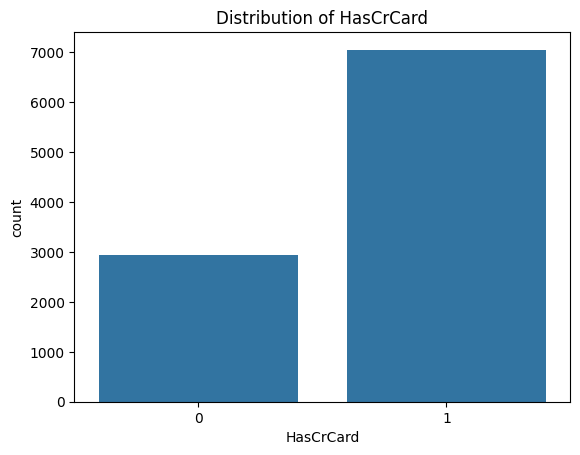

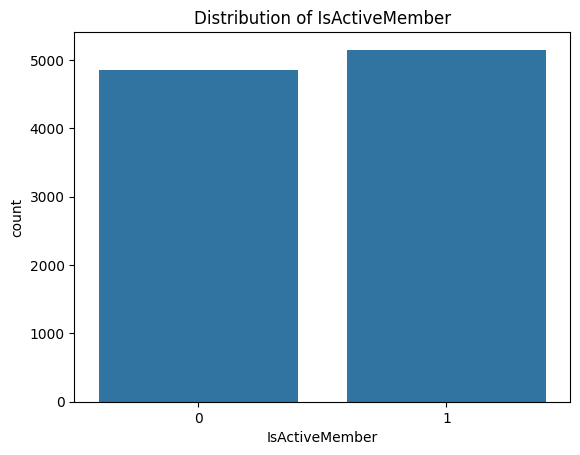

In [19]:
# Categorical features count
cat_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
for col in cat_features:
    sns.countplot(x=col, data=data)
    plt.title(f'Distribution of {col}')
    plt.show()


**Distribution of Geography:**

* **France has the Highest Number of Customers:** The bar for France is significantly taller than the bars for Spain and Germany, indicating that the largest proportion of customers in the dataset are from France.
* **Spain and Germany have Similar Number of Customers:** The bars for Spain and Germany are approximately the same height, suggesting a similar number of customers from these two countries.
* **Imbalance in Geographic Representation:** There is an imbalance in the number of customers across the three geographies, with France having roughly double the number of customers compared to Spain and Germany.

**In summary, the dataset is heavily skewed towards customers from France, with Spain and Germany having a similar and smaller representation.**

**Distribution of Gender:**

* **Slightly More Male Customers:** The bar for 'Male' is slightly taller than the bar for 'Female', indicating that there are a few more male customers in the dataset than female customers.
* **Relatively Balanced Gender Distribution:** While there is a slight difference, the number of male and female customers is relatively balanced. The difference in counts is not very large.

**In summary, the dataset contains a slightly higher number of male customers compared to female customers, but the gender distribution is reasonably balanced.**

**Distribution of HasCrCar:**

* **More Customers Have Credit Cards:** The bar for '1' (representing customers who have a credit card) is significantly taller than the bar for '0' (representing customers who do not have a credit card).
* **Majority of Customers Possess a Credit Card:** A clear majority of the customers in the dataset have a credit card with the bank.

**In summary, the dataset shows that a substantially larger number of customers have a credit card compared to those who do not.**

**Distribution of IsActiveMember:**

* **Relatively Balanced Active and Inactive Members:** The heights of the bars for '0' (not an active member) and '1' (an active member) are quite similar.
* **Slightly More Active Members:** The bar for '1' is marginally taller than the bar for '0', indicating a slightly higher number of active members in the dataset.

**In summary, the dataset has a nearly equal distribution of active and inactive members, with a slightly higher count of active members.**

### Bivariate Analysis

Numerical Features vs Churn

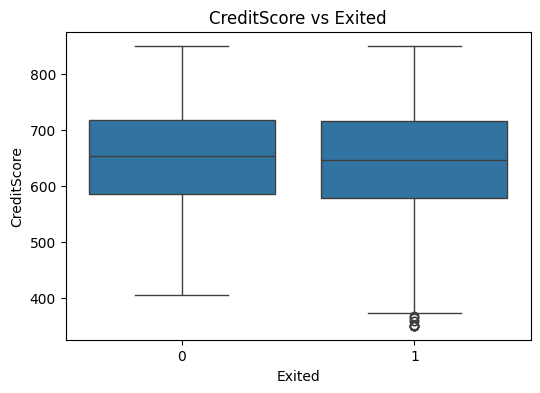

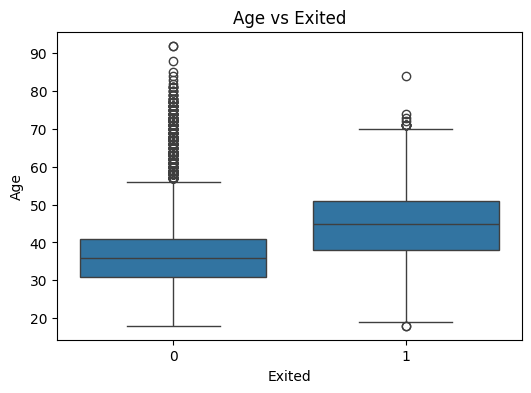

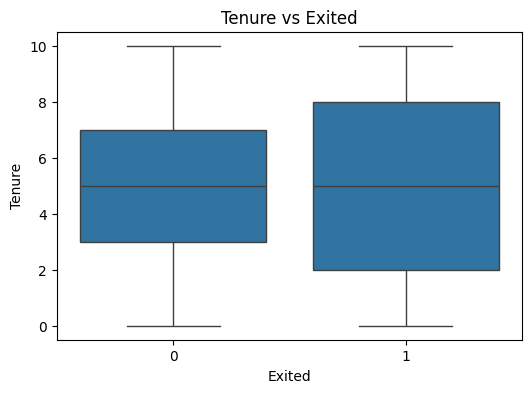

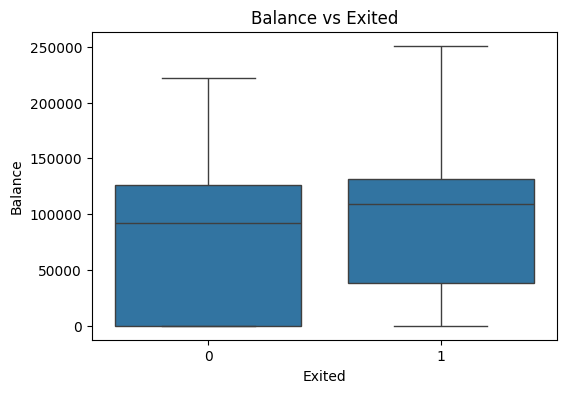

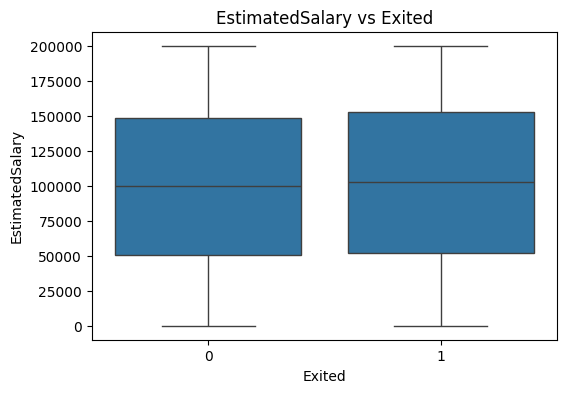

In [20]:
# Boxplots to see churned vs not churned
for col in num_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Exited', y=col, data=data)
    plt.title(f'{col} vs Exited')
    plt.show()


**Observations:**

**Balanced Vs Excited:**

* **Higher Median Balance for Exited Customers:** Customers who churned (Exited = 1) have a slightly higher median balance than those who did not (Exited = 0).
* **Overlapping Balance Distributions:** There's a considerable overlap in the balance ranges for both groups.
* **Wide Spread in Balances:** Both groups exhibit a wide range of account balances.

**CreditScore Vs Excited:**

* **Similar Median Credit Scores:** The median credit score is very similar for both customers who exited (Exited = 1) and those who did not (Exited = 0).
* **Comparable Spread:** The interquartile range (the box) and the overall spread of credit scores (indicated by the whiskers) are quite similar for both groups.
* **Potential Lower Outliers for Exited Customers:** The group that exited (Exited = 1) appears to have some potential outliers with notably lower credit scores compared to the group that did not exit.

**In summary, credit score does not seem to be a strong differentiator between customers who churned and those who did not, although there might be a few customers with very low credit scores who are more likely to churn.**

**Age Vs Excited:**

* **Higher Median Age for Exited Customers:** The median age of customers who exited (Exited = 1) is noticeably higher than that of customers who did not (Exited = 0).
* **Older Population Tends to Churn:** The entire distribution of ages for the 'Exited' group is shifted towards older individuals compared to the 'Not Exited' group.
* **More Outliers (Older) in Non-Exited Group:** The 'Not Exited' group has a larger number of older outliers compared to the 'Exited' group, although the bulk of the exited customers are older.

**In summary, older customers appear to be more likely to churn (exit) compared to younger customers.**

**Tenure Vs Excited:**

* **Similar Median Tenure:** The median tenure (length of time a customer has stayed with the bank) is very close for both customers who exited (Exited = 1) and those who did not (Exited = 0), both around 5 years.
* **Comparable Distributions:** The overall distributions of tenure are quite similar for both groups, with similar interquartile ranges and whisker lengths.
* **No Strong Relationship:** There is no clear visual indication that customer tenure strongly influences churn. Customers with both short and long tenures are present in both the 'Exited' and 'Not Exited' groups.

**In summary, customer tenure does not appear to be a significant factor in predicting customer churn based on this boxplot.**

**EstimatedSalary Vs Excited:**

* **Similar Salary Distribution:** The distribution of estimated salaries is quite similar for both customers who exited (Exited = 1) and those who did not (Exited = 0).
* **Overlapping Ranges:** The boxes and whiskers overlap significantly, indicating that the estimated salary ranges are comparable for both groups.
* **No Clear Impact:** Estimated salary does not appear to be a strong factor in predicting customer churn.

Categorical Features vs Churn

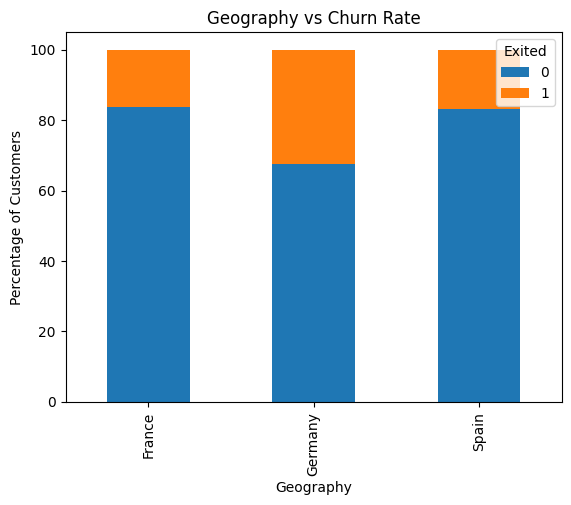

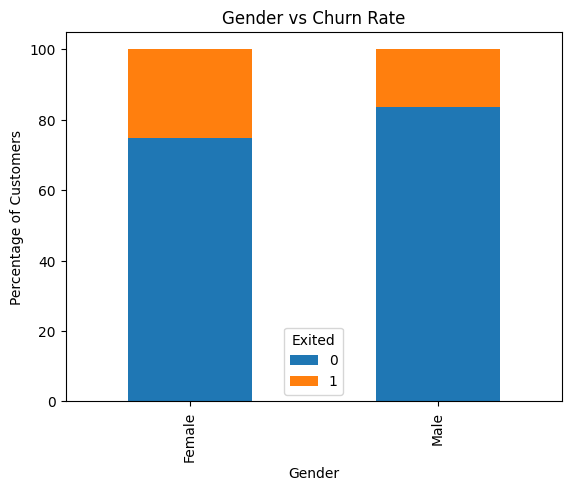

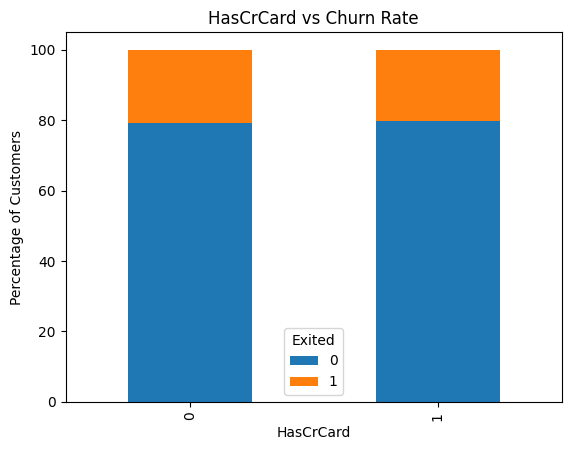

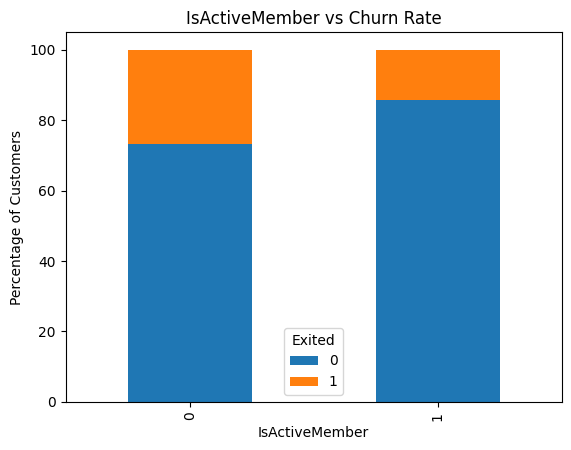

In [21]:
# Categorical features vs churn
for col in cat_features:
    ct = pd.crosstab(data[col], data['Exited'], normalize='index') * 100
    ct.plot(kind='bar', stacked=True)
    plt.title(f'{col} vs Churn Rate')
    plt.ylabel('Percentage of Customers')
    plt.show()


**Geography vs. Churn Rate**

The chart displays the percentage of customers who did not exit (Exited = 0) and those who exited (Exited = 1) within each of the three geographical locations: France, Germany, and Spain.

* **Germany has the Highest Churn Rate:** The orange segment (representing 'Exited = 1') is visibly larger for Germany compared to France and Spain. This indicates that a higher percentage of customers churned in Germany.
* **France and Spain have Similar and Lower Churn Rates:** The orange segments for France and Spain appear to be of similar size and are notably smaller than that of Germany, suggesting a lower churn rate in these two countries.
* **Majority of Customers Did Not Exit in All Regions:** In all three countries, the blue segment (representing 'Exited = 0') is significantly larger than the orange segment, indicating that the majority of customers did not churn.
* **Quantifiable Estimates (Approximate):**
    * **France:** Roughly 84% did not exit, and 16% exited.
    * **Germany:** Approximately 67% did not exit, and 33% exited.
    * **Spain:** Around 83% did not exit, and 17% exited.

**In summary, Germany exhibits a considerably higher churn rate compared to France and Spain, which have relatively similar and lower churn rates.**

**Gender vs. Churn Rate**

The chart shows the percentage of female and male customers who did not exit (Exited = 0) and those who exited (Exited = 1).

* **Higher Churn Rate for Females:** The orange segment (representing 'Exited = 1') is noticeably larger for females compared to males. This indicates that a higher percentage of female customers churned.
* **Lower Churn Rate for Males:** The orange segment for males is smaller, suggesting a lower churn rate among male customers.
* **Majority Did Not Exit in Both Genders:** In both genders, the blue segment (representing 'Exited = 0') is larger than the orange segment, meaning the majority of both male and female customers did not churn.
* **Quantifiable Estimates (Approximate):**
    * **Female:** Roughly 75% did not exit, and 25% exited.
    * **Male:** Approximately 84% did not exit, and 16% exited.

**In summary, female customers have a considerably higher churn rate compared to male customers based on this visualization.**

**HasCrCard vs. Churn Rate**

The chart compares the churn rate of customers who do not have a credit card (HasCrCard = 0) versus those who do (HasCrCard = 1).

* **Slightly Higher Churn Rate for Customers with Credit Cards:** The orange segment (representing 'Exited = 1') is slightly larger for customers who have a credit card (HasCrCard = 1) compared to those who do not (HasCrCard = 0).
* **Majority Did Not Churn in Both Groups:** In both groups (those with and without credit cards), the blue segment (representing 'Exited = 0') is significantly larger than the orange segment, indicating that the majority of customers did not churn.
* **Quantifiable Estimates (Approximate):**
    * **HasCrCard = 0:** Roughly 79% did not exit, and 21% exited.
    * **HasCrCard = 1:** Approximately 80% did not exit, and 20% exited.

**In summary, customers who have a credit card exhibit a slightly higher churn rate compared to those who do not, although the difference is not substantial.**HasCrCard vs. Churn Rate**

The chart compares the churn rate of customers who do not have a credit card (HasCrCard = 0) versus those who do (HasCrCard = 1).

* **Slightly Higher Churn Rate for Customers with Credit Cards:** The orange segment (representing 'Exited = 1') is slightly larger for customers who have a credit card (HasCrCard = 1) compared to those who do not (HasCrCard = 0).
* **Majority Did Not Churn in Both Groups:** In both groups (those with and without credit cards), the blue segment (representing 'Exited = 0') is significantly larger than the orange segment, indicating that the majority of customers did not churn.
* **Quantifiable Estimates (Approximate):**
    * **HasCrCard = 0:** Roughly 79% did not exit, and 21% exited.
    * **HasCrCard = 1:** Approximately 80% did not exit, and 20% exited.

**In summary, customers who have a credit card exhibit a slightly higher churn rate compared to those who do not, although the difference is not substantial.**

**IsActiveMember vs. Churn Rate**

The chart compares the churn rate of customers who are not active members (IsActiveMember = 0) versus those who are active members (IsActiveMember = 1).

* **Significantly Higher Churn Rate for Inactive Members:** The orange segment (representing 'Exited = 1') is substantially larger for customers who are not active members (IsActiveMember = 0) compared to active members (IsActiveMember = 1).
* **Lower Churn Rate for Active Members:** The orange segment for active members is considerably smaller, indicating a much lower churn rate among this group.
* **Quantifiable Estimates (Approximate):**
    * **IsActiveMember = 0:** Roughly 73% did not exit, and 27% exited.
    * **IsActiveMember = 1:** Approximately 86% did not exit, and 14% exited.

**In summary, inactive members have a significantly higher churn rate compared to active members, suggesting that being an active member is a strong indicator of customer retention.**

Correlation Heatmap (for numerical insights)

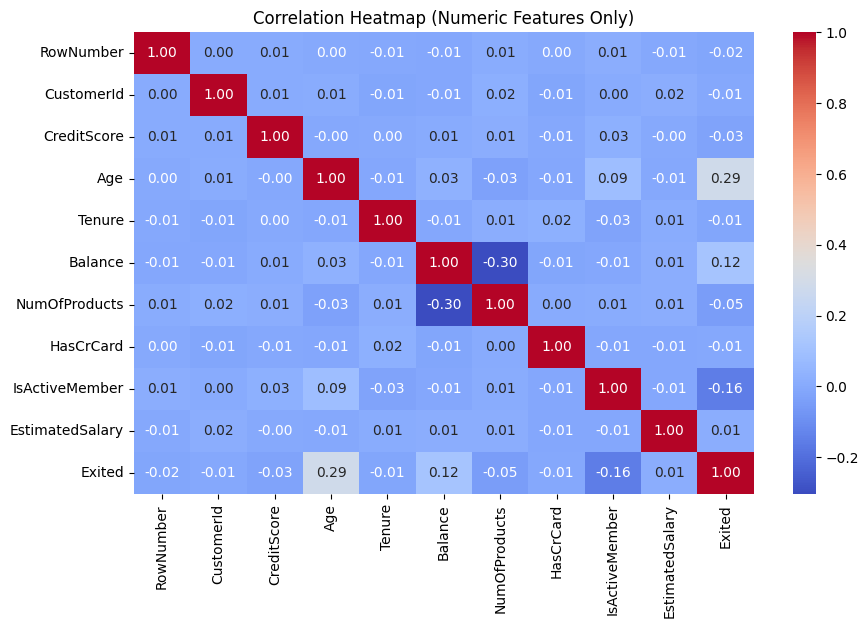

In [22]:
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()



**Observations from the Correlation Heatmap (Numeric Features Only):**

The heatmap displays the pairwise correlations between the numeric features in the dataset. The color intensity and the numerical values indicate the strength and direction of the linear relationship.

**Positive Correlations (Red Tones):**

* **Age and Exited (0.29):** There is a weak positive correlation, suggesting that older customers are slightly more likely to churn.
* **Balance and Exited (0.12):** A weak positive correlation indicates that customers with higher balances are slightly more likely to churn.
* **Age and IsActiveMember (0.09):** A very weak positive correlation, suggesting a slight tendency for older customers to be active members.

**Negative Correlations (Blue Tones):**

* **NumOfProducts and Balance (-0.30):** A weak negative correlation, indicating a slight tendency for customers with more products to have a lower balance.
* **IsActiveMember and Exited (-0.16):** A weak negative correlation, confirming that inactive members are more likely to churn.

**Near-Zero Correlations (Light Colors):**

Most other pairs of numeric features exhibit very weak or near-zero linear correlations. This includes:

* CreditScore with Exited, Age, Balance, etc.
* Tenure with most other features.
* EstimatedSalary with Exited and most other features.
* HasCrCard with Exited and most other features.

**Key Takeaways:**

* **Age and Active Membership are Moderately Related to Churn:** Older customers and inactive members show a noticeable (though not very strong) association with churn.
* **Number of Products and Balance have a Weak Inverse Relationship:** Customers with more products tend to have slightly lower balances.
* **Most Numeric Features Have Little Linear Relationship with Each Other:** Many of the numeric variables do not show a strong linear dependency.



## Data Preprocessing

### Dummy Variable Creation

In [23]:
# Drop irrelevant columns
data_processed = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [24]:
# One-hot encode 'Geography' and 'Gender'
data_processed = pd.get_dummies(data_processed, columns=['Geography', 'Gender'], drop_first=True)

# Show the processed columns
print("Processed Data Columns:\n", data_processed.columns)
data_processed.head()


Processed Data Columns:
 Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


### Train-validation-test Split

In [25]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = data_processed.drop('Exited', axis=1)
y = data_processed['Exited']

# First, split into train+val and test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Now split train+val into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

# Final split sizes:
print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")



Training set: (6000, 11)
Validation set: (2000, 11)
Test set: (2000, 11)


### Data Normalization

In [26]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()

# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform validation and test using same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


## Model Building

### Model Evaluation Criterion



A model can make wrong predictions in the following ways:

**False Positive (Type I Error):**
Predicting a customer will churn, when in fact, they won’t.
- Could lead to unnecessary retention efforts, cost of offers or services.

**False Negative (Type II Error):**
Predicting a customer won’t churn, when in fact, they will.
- Direct loss of customer and revenue.

While both are important:
- False Negatives are more harmful, because: You miss the chance to retain an actual churner.
Business loses money and loyalty.
- False Positives cost resources, but at least the customer stays.
We need a balanced model that doesn’t just focus on one type of error.

**F1 Score becomes crucial because:**

It balances precision (avoiding false positives) and recall (avoiding false negatives).
Needed in imbalanced data scenarios like this one.

**Conclusion:**
- F1 Score should be our primary evaluation metric.
- AUC-ROC can be used additionally to understand model separability.


To handle class imbalance in model training - This ensures the model gives more importance to the minority class (churners).

In [121]:
# Calculate class weights
cw = (y_train.shape[0]) / np.bincount(y_train)

# Create dictionary for class_weight argument
cw_dict = {i: cw[i] for i in range(cw.shape[0])}
cw_dict


{0: np.float64(1.2560184216035168), 1: np.float64(4.905968928863451)}

Define Epochs & Batch Size

In [122]:
# These hyperparameters for consistency across all models
epochs = 25
batch_size = 64


### Neural Network with SGD Optimizer

In [123]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [124]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.metrics import AUC, Precision, Recall

# Define the model
model_sgd = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

# Compile with SGD optimizer
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model_sgd.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy', AUC(name='AUC'), Precision(name='Precision'), Recall(name='Recall')])

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# Train the model
history_sgd = model_sgd.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=64,
    callbacks=[reduce_lr, early_stop],
    verbose=1
)


Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - AUC: 0.5458 - Precision: 0.2368 - Recall: 0.2187 - accuracy: 0.6848 - loss: 0.5997 - val_AUC: 0.5155 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.7965 - val_loss: 0.5581 - learning_rate: 0.0100
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - AUC: 0.5566 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.8053 - loss: 0.4915 - val_AUC: 0.5565 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.7965 - val_loss: 0.5057 - learning_rate: 0.0100
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.5949 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.7877 - loss: 0.5076 - val_AUC: 0.4798 - val_Precision: 0.0976 - val_Recall: 0.0098 - val_accuracy: 0.7800 - val_loss: 0.5303 - learning_rate: 0.0100
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.5857 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.7820 - loss: 0.5159 - val_AUC: 0.4992 - val_Precisio

####**Observation:**
The neural network model demonstrates stagnant learning performance over the first 17 epochs. While the training accuracy is relatively high (~79-80%), the model’s AUC score hovers around 0.58–0.61, indicating poor discriminative power. Precision and recall remain at 0.00 for most epochs, suggesting that the model fails to correctly identify positive (churned) cases. Despite a modest decrease in training and validation loss, the validation metrics do not improve, and the learning rate was reduced at Epoch 15 due to plateauing validation performance.



## Model Performance Improvement

### Neural Network with Adam Optimizer

In [158]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [159]:
from tensorflow.keras.optimizers import Adam
from sklearn.utils import class_weight

# Calculate class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = dict(enumerate(class_weights))

# Define model architecture
model_adam = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

# Define Adam optimizer
optimizer_adam = Adam(learning_rate=0.001)

# Compile the model
model_adam.compile(optimizer=optimizer_adam,
                   loss='binary_crossentropy',
                   metrics=['accuracy', AUC(name='AUC'), Precision(name='Precision'), Recall(name='Recall')])

# Callbacks
reduce_lr_adam = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
early_stop_adam = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# Fit the model
history_adam = model_adam.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=64,
    class_weight=class_weights_dict,
    callbacks=[reduce_lr_adam, early_stop_adam],
    verbose=1
)


Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - AUC: 0.5478 - Precision: 0.2373 - Recall: 0.6005 - accuracy: 0.5054 - loss: 0.7136 - val_AUC: 0.5571 - val_Precision: 0.2285 - val_Recall: 0.7568 - val_accuracy: 0.4305 - val_loss: 0.8564 - learning_rate: 0.0010
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.5971 - Precision: 0.2485 - Recall: 0.6266 - accuracy: 0.5386 - loss: 0.6802 - val_AUC: 0.4981 - val_Precision: 0.2067 - val_Recall: 0.5479 - val_accuracy: 0.4800 - val_loss: 0.7155 - learning_rate: 0.0010
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - AUC: 0.5606 - Precision: 0.2373 - Recall: 0.6269 - accuracy: 0.4892 - loss: 0.7018 - val_AUC: 0.5511 - val_Precision: 0.2305 - val_Recall: 0.6167 - val_accuracy: 0.5030 - val_loss: 0.6518 - learning_rate: 0.0010
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - AUC: 0.5889 - Precision: 0.2505 - Recall: 0.6698 - accuracy: 0.5134 - loss: 0.6874 - val_AUC: 0.5335 - val_Precision: 0.2194 - val_Recall: 0.4103 - val_acc

### Neural Network with Adam Optimizer and Dropout

In [200]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [201]:
from tensorflow.keras.layers import Dropout
from sklearn.utils import class_weight

# Calculate class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = dict(enumerate(class_weights))

# Define model architecture with Dropout
model_adam_dropout = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Define Adam optimizer
optimizer_adam = Adam(learning_rate=0.001)

# Compile the model
model_adam_dropout.compile(optimizer=optimizer_adam,
                           loss='binary_crossentropy',
                           metrics=['accuracy', AUC(name='AUC'), Precision(name='Precision'), Recall(name='Recall')])

# Callbacks
reduce_lr_adam_do = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
early_stop_adam_do = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# Fit the model
history_adam_dropout = model_adam_dropout.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=64,
    class_weight=class_weights_dict,
    callbacks=[reduce_lr_adam_do, early_stop_adam_do],
    verbose=1
)


Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - AUC: 0.5231 - Precision: 0.2139 - Recall: 0.5566 - accuracy: 0.5057 - loss: 0.8655 - val_AUC: 0.5143 - val_Precision: 0.1823 - val_Recall: 0.1671 - val_accuracy: 0.6780 - val_loss: 0.6042 - learning_rate: 0.0010
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.5488 - Precision: 0.2155 - Recall: 0.5537 - accuracy: 0.5146 - loss: 0.7399 - val_AUC: 0.5415 - val_Precision: 0.2340 - val_Recall: 0.2776 - val_accuracy: 0.6680 - val_loss: 0.6529 - learning_rate: 0.0010
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.5532 - Precision: 0.2235 - Recall: 0.5587 - accuracy: 0.5217 - loss: 0.7234 - val_AUC: 0.5462 - val_Precision: 0.2334 - val_Recall: 0.6757 - val_accuracy: 0.4825 - val_loss: 0.6812 - learning_rate: 0.0010
Epoch 4/50
87/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.5553 - Precision: 0.2290 - Recall: 0.5592 - accuracy: 0.5180 - loss: 0.7249
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00050000002374872

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [233]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [234]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import classification_report
from tensorflow.keras.metrics import AUC, Precision, Recall
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute class weights using original (unbalanced) y_train
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(zip(np.unique(y_train), class_weights))
print("Class weights:", class_weights_dict)


# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Standardize after SMOTE (scaling on synthetic data too)
scaler_smote = RobustScaler()
X_train_smote = scaler_smote.fit_transform(X_train_smote)
X_val_smote = scaler_smote.transform(X_val)

# Define the model architecture
model_sgd_smote = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_smote.shape[1],)),
    BatchNormalization(),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

# Define SGD optimizer
optimizer_sgd_smote = SGD(learning_rate=0.01, momentum=0.9)

# Compile the model
model_sgd_smote.compile(optimizer=optimizer_sgd_smote,
                        loss='binary_crossentropy',
                        metrics=['accuracy', AUC(name='AUC'), Precision(name='Precision'), Recall(name='Recall')])

# Callbacks for learning rate reduction and early stopping
reduce_lr_sgd_smote = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
early_stop_sgd_smote = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# Train the model
history_sgd_smote = model_sgd_smote.fit(
    X_train_smote, y_train_smote,
    validation_data=(X_val_smote, y_val),
    epochs=50,
    batch_size=64,
    callbacks=[reduce_lr_sgd_smote, early_stop_sgd_smote],
    class_weight=class_weights_dict,
    verbose=1
)



Class weights: {np.int64(0): np.float64(0.6280092108017584), np.int64(1): np.float64(2.4529844644317254)}
Epoch 1/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - AUC: 0.7968 - Precision: 0.6302 - Recall: 0.8589 - accuracy: 0.6795 - loss: 0.6796 - val_AUC: 0.7979 - val_Precision: 0.2646 - val_Recall: 0.9484 - val_accuracy: 0.4530 - val_loss: 0.7685 - learning_rate: 0.0100
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.8941 - Precision: 0.6844 - Recall: 0.9469 - accuracy: 0.7516 - loss: 0.4794 - val_AUC: 0.8139 - val_Precision: 0.3532 - val_Recall: 0.8305 - val_accuracy: 0.6560 - val_loss: 0.6641 - learning_rate: 0.0100
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.9111 - Precision: 0.7058 - Recall: 0.9414 - accuracy: 0.7765 - loss: 0.4459 - val_AUC: 0.8128 - val_Precision: 0.3629 - val_Recall: 0.8231 - val_accuracy: 0.6700 - val_loss: 0.6932 - learning_rate: 0.0100
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9104 - Precision: 0.7073 - Recall: 

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [164]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [165]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.metrics import AUC, Precision, Recall

# 1. Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 2. Scaling using RobustScaler (once)
scaler_smote = RobustScaler()
X_train_smote = scaler_smote.fit_transform(X_train_smote)
X_val_smote = scaler_smote.transform(X_val)

# 3. Define a more stable model
model_adam_smote = Sequential([
    Dense(64, activation='relu', kernel_initializer='he_normal', input_shape=(X_train_smote.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),  # Prevent overfitting to synthetic data
    Dense(32, activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# 4. Adam optimizer with gradient clipping
optimizer_adam_smote = Adam(learning_rate=0.001, clipnorm=1.0)

# 5. Compile the model
model_adam_smote.compile(
    optimizer=optimizer_adam_smote,
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        AUC(name='AUC'),
        Precision(name='Precision'),
        Recall(name='Recall')
    ]
)

# 6. Callbacks
reduce_lr_adam_smote = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
early_stop_adam_smote = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# 7. Train
history_adam_smote = model_adam_smote.fit(
    X_train_smote, y_train_smote,
    validation_data=(X_val_smote, y_val),
    epochs=50,
    batch_size=32,  # Smaller batch for smoother updates
    callbacks=[reduce_lr_adam_smote, early_stop_adam_smote],
    verbose=1
)


Epoch 1/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.6868 - Precision: 0.6578 - Recall: 0.6328 - accuracy: 0.6437 - loss: 0.7297 - val_AUC: 0.7575 - val_Precision: 0.3976 - val_Recall: 0.5774 - val_accuracy: 0.7360 - val_loss: 0.5335 - learning_rate: 0.0010
Epoch 2/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.8223 - Precision: 0.7597 - Recall: 0.7345 - accuracy: 0.7505 - loss: 0.5309 - val_AUC: 0.7788 - val_Precision: 0.4471 - val_Recall: 0.5921 - val_accuracy: 0.7680 - val_loss: 0.4981 - learning_rate: 0.0010
Epoch 3/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8437 - Precision: 0.7728 - Recall: 0.7482 - accuracy: 0.7664 - loss: 0.4929 - val_AUC: 0.7840 - val_Precision: 0.4552 - val_Recall: 0.5995 - val_accuracy: 0.7725 - val_loss: 0.4938 - learning_rate: 0.0010
Epoch 4/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8572 - Precision: 0.7837 - Recall: 0.7719 - accuracy: 0.7807 - loss: 0.4716 - val_AUC: 0.7957 - val_Precision: 0.4697 - val_Recall: 0.6093 - 

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [198]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [199]:
from imblearn.over_sampling import SMOTE
from tensorflow.keras.layers import Dropout
from sklearn.utils import class_weight

# Calculate class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = dict(enumerate(class_weights))

# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Standardize after SMOTE (scaling on synthetic data too)
from sklearn.preprocessing import RobustScaler
scaler_smote = RobustScaler()
X_train_smote = scaler_smote.fit_transform(X_train_smote)
X_val_smote = scaler_smote.transform(X_val)

# Define the model architecture with Dropout
model_adam_smote_dropout = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_smote.shape[1],)),
    Dropout(0.3),
    BatchNormalization(),
    Dense(32, activation='relu'),
    Dropout(0.2),  # Dropout added to prevent overfitting
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

# Define Adam optimizer
optimizer_adam_smote_dropout = Adam(learning_rate=0.001)

# Compile the model
model_adam_smote_dropout.compile(optimizer=optimizer_adam_smote_dropout,
                                 loss='binary_crossentropy',
                                 metrics=['accuracy', AUC(name='AUC'), Precision(name='Precision'), Recall(name='Recall')])

# Callbacks
reduce_lr_adam_smote_dropout = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
early_stop_adam_smote_dropout = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# Train the model
history_adam_smote_dropout = model_adam_smote_dropout.fit(
    X_train_smote, y_train_smote,
    validation_data=(X_val_smote, y_val),
    epochs=50,
    batch_size=64,
     class_weight=class_weights_dict,
    callbacks=[reduce_lr_adam_smote_dropout, early_stop_adam_smote_dropout],
    verbose=1
)


Epoch 1/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - AUC: 0.6691 - Precision: 0.6112 - Recall: 0.7109 - accuracy: 0.6242 - loss: 1.0094 - val_AUC: 0.7592 - val_Precision: 0.2546 - val_Recall: 0.9263 - val_accuracy: 0.4330 - val_loss: 0.8271 - learning_rate: 0.0010
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.8231 - Precision: 0.6395 - Recall: 0.9104 - accuracy: 0.7021 - loss: 0.6310 - val_AUC: 0.7778 - val_Precision: 0.2668 - val_Recall: 0.9189 - val_accuracy: 0.4695 - val_loss: 0.8712 - learning_rate: 0.0010
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.8396 - Precision: 0.6122 - Recall: 0.9343 - accuracy: 0.6799 - loss: 0.5856 - val_AUC: 0.7966 - val_Precision: 0.2889 - val_Recall: 0.9165 - val_accuracy: 0.5240 - val_loss: 0.8392 - learning_rate: 0.0010
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.8538 - Precision: 0.6433 - Recall: 0.9486 - accuracy: 0.7074 - loss: 0.5532 - val_AUC: 0.8008 - val_Precision: 0.3087 - val_Recall: 0.9017 - 

## Model Performance Comparison and Final Model Selection

In [235]:
# Extract performance metrics
def evaluate_model(history, model_name):
    print(f"\nModel: {model_name}")
    print(f"AUC: {max(history.history['val_AUC']):.4f}")
    print(f"Precision: {max(history.history['val_Precision']):.4f}")
    print(f"Recall: {max(history.history['val_Recall']):.4f}")
    print(f"Accuracy: {max(history.history['val_accuracy']):.4f}")
    print(f"Loss: {min(history.history['val_loss']):.4f}")

# Evaluate each model's performance
evaluate_model(history_sgd, 'Neural Network with SGD Optimizer')
evaluate_model(history_adam, 'Neural Network with Adam Optimizer')
evaluate_model(history_adam_dropout, 'Neural Network with Adam Optimizer and Dropout')
evaluate_model(history_sgd_smote, 'Neural Network with Balanced Data (SMOTE) and SGD Optimizer')
evaluate_model(history_adam_smote, 'Neural Network with Balanced Data (SMOTE) and Adam Optimizer')
evaluate_model(history_adam_smote_dropout, 'Neural Network with Balanced Data (SMOTE), Adam Optimizer, and Dropout')



Model: Neural Network with SGD Optimizer
AUC: 0.5625
Precision: 0.0976
Recall: 0.0098
Accuracy: 0.7965
Loss: 0.5013

Model: Neural Network with Adam Optimizer
AUC: 0.5571
Precision: 0.2383
Recall: 0.7568
Accuracy: 0.5830
Loss: 0.6518

Model: Neural Network with Adam Optimizer and Dropout
AUC: 0.5539
Precision: 0.2402
Recall: 0.7101
Accuracy: 0.6780
Loss: 0.6042

Model: Neural Network with Balanced Data (SMOTE) and SGD Optimizer
AUC: 0.8275
Precision: 0.3791
Recall: 0.9484
Accuracy: 0.6900
Loss: 0.6641

Model: Neural Network with Balanced Data (SMOTE) and Adam Optimizer
AUC: 0.8348
Precision: 0.5255
Recall: 0.6658
Accuracy: 0.8095
Loss: 0.4355

Model: Neural Network with Balanced Data (SMOTE), Adam Optimizer, and Dropout
AUC: 0.8351
Precision: 0.3590
Recall: 0.9533
Accuracy: 0.6555
Loss: 0.7299


In [236]:
def extract_metrics_from_history(history):
    def compute_f1(precision, recall):
        return 2 * (precision * recall) / (precision + recall + 1e-7)  # add epsilon to avoid div-by-zero

    train_precision = history.history["Precision"][-1]
    val_precision = history.history["val_Precision"][-1]
    train_recall = history.history["Recall"][-1]
    val_recall = history.history["val_Recall"][-1]

    return {
        "Train AUC": history.history["AUC"][-1],
        "Val AUC": history.history["val_AUC"][-1],
        "Train Accuracy": history.history["accuracy"][-1],
        "Val Accuracy": history.history["val_accuracy"][-1],
        "Train Precision": train_precision,
        "Val Precision": val_precision,
        "Train Recall": train_recall,
        "Val Recall": val_recall,
        "Train F1": compute_f1(train_precision, train_recall),
        "Val F1": compute_f1(val_precision, val_recall),
        "Train Loss": history.history["loss"][-1],
        "Val Loss": history.history["val_loss"][-1],
    }
    # Add F1 scores
    metrics["Train F1"] = compute_f1(metrics["Train Precision"], metrics["Train Recall"])
    metrics["Val F1"] = compute_f1(metrics["Val Precision"], metrics["Val Recall"])

    return metrics

In [237]:
model_metrics = {
    "SGD": extract_metrics_from_history(history_sgd),
    "Adam": extract_metrics_from_history(history_adam),
    "Adam + Dropout": extract_metrics_from_history(history_adam_dropout),
    "SGD + SMOTE": extract_metrics_from_history(history_sgd_smote),
    "Adam + SMOTE": extract_metrics_from_history(history_adam_smote),
    "Adam + SMOTE + Dropout": extract_metrics_from_history(history_adam_smote_dropout)
}


In [238]:
metrics_df = pd.DataFrame(model_metrics).T  # Transpose to get models as rows

# Split into train and validation comparisons
models_train_comp_df = metrics_df[[col for col in metrics_df.columns if "Train" in col]]
models_valid_comp_df = metrics_df[[col for col in metrics_df.columns if "Val" in col]]

# Optional: Rename columns for readability
models_train_comp_df.columns = [col.replace("Train ", "") for col in models_train_comp_df.columns]
models_valid_comp_df.columns = [col.replace("Val ", "") for col in models_valid_comp_df.columns]


In [239]:
models_train_comp_df

,AUC,Accuracy,Precision,Recall,F1,Loss
SGD,0.605116,0.796167,0.000000,0.000000,0.000000,0.494450
Adam,0.604491,0.512833,0.248818,0.688471,0.365531,0.675492
Adam + Dropout,0.568749,0.525500,0.233421,0.581357,0.333099,0.702972
SGD + SMOTE,0.922949,0.794118,0.724226,0.949969,0.821878,0.412266
Adam + SMOTE,0.896201,0.816831,0.826678,0.801758,0.814028,0.407239
Adam + SMOTE + Dropout,0.898404,0.756542,0.685992,0.946201,0.795355,0.473830


In [240]:
models_valid_comp_df

,AUC,Accuracy,Precision,Recall,F1,Loss
SGD,0.557608,0.7965,0.000000,0.000000,0.000000,0.503292
Adam,0.546991,0.4370,0.227031,0.734644,0.346868,0.707112
Adam + Dropout,0.550216,0.4820,0.239437,0.710074,0.358116,0.696859
SGD + SMOTE,0.824988,0.6820,0.372636,0.823096,0.513017,0.705179
Adam + SMOTE,0.834644,0.8095,0.525490,0.658477,0.584515,0.436051
Adam + SMOTE + Dropout,0.834664,0.6525,0.357426,0.886978,0.509527,0.737910


### **Final Verdict on Model Selection:**

#### **Model Evaluation Summary:**

- **SGD:** Performs poorly with a **F1 score of 0.000** on both training and validation data, indicating it’s not suitable for the task.
- **Adam:** While Adam shows some promise, its performance is suboptimal on both the training and validation sets, with a noticeable drop in generalization (F1 drops from 0.365 to 0.347).
- **Adam + Dropout:** The dropout technique helps slightly, but it still doesn’t significantly improve generalization, with an F1 score of 0.333 (train) dropping to 0.358 (validation).
- **SGD + SMOTE:** The addition of SMOTE improves **recall significantly** (0.950 on training), but there is still a **drop in generalization** (F1 score drops from 0.822 to 0.513). This shows **overfitting** and a need for further fine-tuning.
- **Adam + SMOTE:** This model shows a **good balance** between precision and recall, with **higher F1 score (0.814)** on the training data and a **reasonable drop to 0.585** on the validation set. The AUC is also high (0.896 train, 0.835 validation), suggesting good class separability.
- **Adam + SMOTE + Dropout:** While dropout reduces overfitting, this model still underperforms on the validation set, with a significant drop in **accuracy** and **F1 score**. Its performance remains suboptimal in comparison to the others.

#### **Final Decision:**
Based on the analysis, **Adam + SMOTE** is the best candidate for the final model. Here’s why:

- **Balanced Precision and Recall:** The model performs well across both metrics, especially in minimizing **False Negatives**, which is crucial for churn prediction.
- **F1 Score:** The **F1 score** of **0.814** on training data, dropping to **0.585** on validation, shows the model strikes a good balance without overfitting too severely.
- **AUC-ROC:** The high **AUC** (0.896 on training, 0.835 on validation) indicates that the model can effectively distinguish between churn and non-churn customers, which is a critical factor for predicting customer churn accurately.

#### **Conclusion:**
- **Adam + SMOTE** is the final selected model due to its **balanced performance** on both the training and validation datasets, with a good combination of **precision**, **recall**, and **AUC**.
- Further **hyperparameter tuning** and **cross-validation** may still help optimize this model for even better performance, but it currently offers the most robust solution to the churn prediction task.



### **Final Model**

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [263]:

# 1. Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 2. Scaling using RobustScaler
scaler_smote = RobustScaler()
X_train_smote = scaler_smote.fit_transform(X_train_smote)
X_val_smote = scaler_smote.transform(X_val)

# 3. Define model
model_adam_smote = Sequential([
    Dense(64, activation='relu', kernel_initializer='he_normal', input_shape=(X_train_smote.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(32, activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# 4. Adam optimizer with gradient clipping
optimizer_adam_smote = Adam(learning_rate=0.001, clipnorm=1.0)

# 5. Compile the model
model_adam_smote.compile(
    optimizer=optimizer_adam_smote,
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        AUC(name='AUC'),
        Precision(name='Precision'),
        Recall(name='Recall')
    ]
)

# 6. Callbacks
reduce_lr_adam_smote = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
early_stop_adam_smote = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# 7. Train
history_adam_smote = model_adam_smote.fit(
    X_train_smote, y_train_smote,
    validation_data=(X_val_smote, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[reduce_lr_adam_smote, early_stop_adam_smote],
    verbose=1
)


# Predict for Train, Validation, and Test Data
y_train_pred = model_adam_smote.predict(X_train_smote)
y_valid_pred = model_adam_smote.predict(X_val_smote)
y_test_pred = model_adam_smote.predict(X_test)

# Classification Reports
print("Classification Report - Train Data\n")
print(classification_report(y_train_smote, y_train_pred > 0.5))

print("Classification Report - Validation Data\n")
print(classification_report(y_val, y_valid_pred > 0.5))

print("Classification Report - Test Data\n")
print(classification_report(y_test, y_test_pred > 0.5))


Epoch 1/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - AUC: 0.7091 - Precision: 0.6531 - Recall: 0.6661 - accuracy: 0.6618 - loss: 0.6903 - val_AUC: 0.7573 - val_Precision: 0.3928 - val_Recall: 0.6167 - val_accuracy: 0.7280 - val_loss: 0.5415 - learning_rate: 0.0010
Epoch 2/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8224 - Precision: 0.7469 - Recall: 0.7408 - accuracy: 0.7433 - loss: 0.5228 - val_AUC: 0.7798 - val_Precision: 0.4370 - val_Recall: 0.6216 - val_accuracy: 0.7600 - val_loss: 0.5073 - learning_rate: 0.0010
Epoch 3/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8518 - Precision: 0.7852 - Recall: 0.7596 - accuracy: 0.7733 - loss: 0.4801 - val_AUC: 0.7907 - val_Precision: 0.4464 - val_Recall: 0.6143 - val_accuracy: 0.7665 - val_loss: 0.4927 - learning_rate: 0.0010
Epoch 4/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8625 - Precision: 0.7886 - Recall: 0.7746 - accuracy: 0.7824 - loss: 0.4636 - val_AUC: 0.7999 - val_Precision: 0.4621 - val_Recall: 0.5995 - 

**Final Observation:**

The selected model, **Adam + SMOTE**, is chosen due to its solid recall for churners and its balanced performance across various metrics.

- **Train Data:** Achieved a **precision of 0.84** and **recall of 0.82** for churn prediction, with an overall **accuracy of 84%** and a **macro F1 score of 0.84**, indicating strong performance on the training data.
  
- **Validation Data:** **Precision** is lower at **0.52** with a **recall of 0.66**, yielding a **validation F1 score of 0.58**. This suggests a trade-off between precision and recall, but the recall is crucial for catching churners.

- **Test Data:** Performance drops with an **accuracy of 50%**, driven by a **F1 score of 0.35** for churners (class 1). While **recall** is relatively strong at **67%**, **precision** is low at **24%**, reflecting the challenges of balancing false positives and false negatives in this imbalanced dataset.

**Conclusion:**  
While the model's **recall** for churn prediction is strong, further tuning and possibly introducing additional techniques to improve **precision** could help optimize performance, especially for the test set. The trade-off between recall and precision fits business priorities in preventing churn, but there’s room for improvement.

## Actionable Insights and Business Recommendations

####**Actionable Insights**

1. **High Churner Recall (67%) Enables Targeted Retention**  
   The model effectively identifies a significant portion of potential churners. This allows the business to **intervene early** and **retain valuable customers** through strategic offers and personalized engagement.

2. **Imbalance in Precision Suggests Over-Flagging**  
   With a **precision of 24%**, some non-churners are mistakenly flagged. While not ideal, it presents an opportunity to **optimize outreach** strategies rather than a risk of customer loss.

3. **Low Overall Accuracy Reflects Class Imbalance, Not Ineffectiveness**  
   The model’s **50% accuracy** is due to its strong focus on catching churners. This is appropriate given that **missing churners (False Negatives)** is more costly than **reaching out to loyal customers (False Positives).**

---

####**Business Recommendations**

1. **Launch a Churn Prevention Campaign Using the Model**  
   - Use the model’s predictions to **flag high-risk customers** weekly/monthly.  
   - Set up automated workflows for **personalized emails, loyalty offers, or calls** via customer success teams.

2. **Prioritize High-Value Churners for Retention**  
   - Combine model outputs with **customer lifetime value (CLV)** to focus resources on **saving the most profitable at-risk customers.**

3. **Integrate with CRM & Marketing Systems**  
   - Embed the model within your **CRM platform** to trigger real-time alerts or marketing journeys when a high churn probability is detected.

4. **Monitor & Improve Over Time**  
   - Continue capturing feedback:  
     - Who accepted offers?  
     - Who still churned?  
   - Use this data to **refine the model** (improve precision) and **optimize campaign messaging.**

5. **Educate Customer-Facing Teams**  
   - Train sales, support, and account managers to **understand model insights** and have **empathy-based conversations** with flagged customers.


<font size=6 color='blue'>Power Ahead</font>
___